In [8]:
import matplotlib.pyplot as plt  # matplotlib for some plotting
import numpy as np  # numeric python functions
import pandas as pd  # need this to load our data from the csv files

In [9]:
# sonic position
x_sonic1 = 0.0
y_sonic1 = 0.0
z_sonic1 = 2.23 # m above ground

In [19]:
# sim params
y_min = -30.0
y_max = 30.0
z_max = 20.0

In [10]:
# def read_csv_data(sonic_data_fn, dt_sonic1):
def read_csv_data(raw_data):
    # read csv
    # raw_data = pd.read_csv(sonic_data_fn, header=None)

    # select only sonic data columns
    sonic_data = raw_data[['u (m/s)', 'v (m/s)', 'w (m/s)']]

    # downsample from 50 Hz to 4 Hz (sonic resolution)
    # sonic_data = sonic_data.resample('250ms').median() # 4 Hz = 250 milliseconds

    # construct time index
    tmp = (sonic_data.index[1]-sonic_data.index[0])
    dt_sonic1 = round(tmp.total_seconds(), 3)
    # print(dt_sonic1)
    tf_sonic1 = len(sonic_data) * dt_sonic1 # final time [s]
    # print(tf_sonic1)
    t_sonic1 = np.arange(0.0, tf_sonic1, dt_sonic1)

    sonic_data = sonic_data.rename(columns={'u (m/s)':'u_p0', 'v (m/s)':'v_p0', 'w (m/s)':'w_p0'})
    for col in sonic_data.filter(regex='u_', axis=1).columns:
        sonic_data[col] = -1.0*sonic_data[col] # to make it positive from the west
    sonic_data['index'] = t_sonic1
    sonic_data = sonic_data.set_index('index')

    return tf_sonic1, sonic_data

# sonic_data_fn = 'sonic1_halfsecond_20Hz.csv'
# sonic_data_fn = 'sonic1_5s_20Hz.csv'
# sonic_data_fn = 'sonic1_20s_20Hz.csv'
# sonic_data_fn = 'sonic1_10min_20Hz.csv'
# sonic_data_fn = 'sonic1_10min_50Hz.csv'
sonic_data_fn = 'DuraMAT_tilt40deg_turbulent_inflow_10min_timeseries.csv'

raw_data = pd.read_csv(sonic_data_fn, index_col='Time')
raw_data.index = pd.to_datetime(raw_data.index)
# raw_data

# tmp = (raw_data.index[1]-raw_data.index[0])
# dt_sonic1 = round(tmp.total_seconds(), 3)

tf_sonic1, sonic_data = read_csv_data(raw_data)
dt = sonic_data.index[1]-sonic_data.index[0]
sonic_data

,u_p0,v_p0,w_p0
index,,,
0.00,9.541354,0.007880,0.718606
0.02,9.540954,0.008039,0.718082
0.04,9.540588,0.007120,0.718604
0.06,9.541167,0.005969,0.718446
0.08,9.541007,0.005632,0.718398
...,...,...,...
599.90,14.001130,2.163276,-0.917014
599.92,14.000917,2.163653,-0.916638
599.94,14.000855,2.163678,-0.916363


In [11]:
# m2 tower data
m2 = {}
m2['u'] = [9.3218, 10.212, 11.211]
m2['z'] = [2, 5, 10]
m2['w_dir'] = [282.07, 275.67, 275.35]
m2['Iu'] = [0.1542, 0.149, 0.1455]

In [13]:
# optional: cut down duration of signal for testing
tf_sonic1 = 30.0 # [s] - this is also how long the synthetic turbulence signal will be
sonic_data = sonic_data.loc[sonic_data.index <= tf_sonic1]

(1501,)

Text(0, 0.5, 'height [m]')

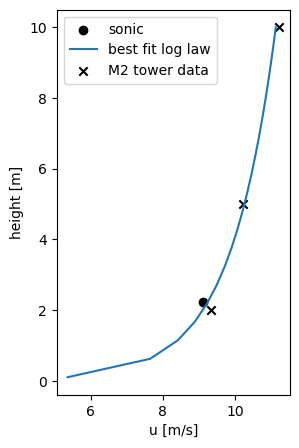

In [14]:
# # log law profile at flatirons - to approximate u_ref input to gen_turb

# z_log = np.linspace(0.1, 10, 20)
# u_log = (0.5/0.4)*np.log(z_log/0.05)+4.5 # to match M2 tower data
# # u_log = (0.55/0.4)*np.log(z_log/0.05)+4.5 # to match sonic data

# # y_idx = (np.abs(y - 0.0)).argmin()
# u_inp = {}
# u_inp['sonic'] = sonic_data.filter(regex='u_', axis=1).values.squeeze()

# fig, axs = plt.subplots(figsize=[3,5])
# axs.scatter(u_inp['sonic'].mean(), z_sonic1, color='k', label='sonic')
# # axs[0].scatter(u_inp['sim'].mean(axis=0), z_fp, color='r', label='sim')
# axs.plot(u_log, z_log, label='best fit log law')
# axs.scatter(m2['u'], m2['z'], color='k', marker='x', label='M2 tower data')
# axs.legend();
# axs.set_xlabel('u [m/s]')
# axs.set_ylabel('height [m]')
# # print('u_max = ',u_inp['sim'].mean(axis=0).max())

In [36]:
m2

{'u': [9.3218, 10.212, 11.211],
 'z': [2, 5, 10],
 'w_dir': [282.07, 275.67, 275.35],
 'Iu': [0.1542, 0.149, 0.1455]}

Found 6 best-fit parameter sets
    row_idx  u_star     z0  stab  z_meas  u_meas  u_pred  abs_error
0         3   0.425  0.056  -5.2       2   9.322   9.324      0.002
1         0   0.400  0.048  -5.6       2   9.322   9.330      0.008
2         2   0.425  0.040  -4.8       2   9.322   9.257      0.065
3         4   0.425  0.060  -5.2       2   9.322   9.251      0.071
4         1   0.400  0.052  -5.6       2   9.322   9.250      0.072
5         5   0.450  0.044  -4.4       2   9.322   9.244      0.078
6         4   0.425  0.060  -5.2       5  10.212  10.224      0.012
7         2   0.425  0.040  -4.8       5  10.212  10.230      0.018
8         0   0.400  0.048  -5.6       5  10.212  10.246      0.034
9         1   0.400  0.052  -5.6       5  10.212  10.166      0.046
10        5   0.450  0.044  -4.4       5  10.212  10.275      0.063
11        3   0.425  0.056  -5.2       5  10.212  10.298      0.086
12        5   0.450  0.044  -4.4      10  11.211  11.054      0.157
13        3   0.

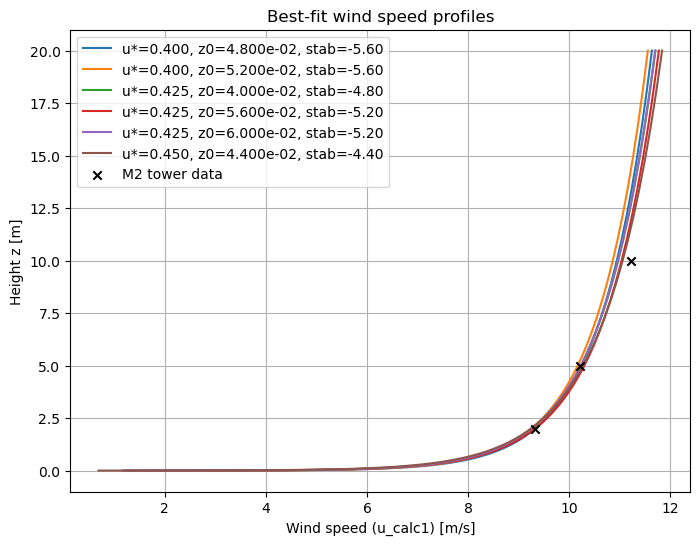

choosing top-ranked params: u_star=0.425m/s, z0=0.056m, stab=-5.2


In [73]:
import itertools

# u_log = (0.5/0.4)*np.log(z_log/0.05)+4.5 # to match M2 tower data

# first find best fit log law for M2 tower data
target_wspds = [m2['u'][1]] # [1.0, 3.0, 5.0]

# Constants
d0 = 0.0 #0.8*h_panels #0.0 # because this sensor is above the solar panel canopy
z_target = m2['z'][1]
z_target2 = m2['z'][0]
kappa = 0.4
# u_star = 0.03

# Sweep ranges (smaller for demo; increase for real use)
u_star_values = np.linspace(0.4, 0.5, 5)
z0_values = np.linspace(0.04, 0.06, 6) # np.logspace(-2, -1, 20) # np.logspace(-3, -1, 30) #[0.03] # np.logspace(-3, -1, 30)
stab_values = np.linspace(-6, -4, 6) # np.linspace(-1, 0.5, 20) #np.linspace(-2, 1, 30)

# Heights to plot
z_values = np.logspace(-3, np.log10(z_max), 100)

for target_u in target_wspds:

    results = []

    for u_star, z0, stab in itertools.product(u_star_values, z0_values, stab_values):
    # for z0 in itertools.product(z0_values):
        if z_target <= d0 or z0 <= 0:
            continue

        # at first height
        u_calc1 = (u_star / kappa) * (np.log((z_target - d0) / z0) - stab)

        # at second height
        u_calc2 = (u_star / kappa) * (np.log((z_target2 - d0) / z0) - stab)
        

        # first select based on error at first height
        if np.isclose(u_calc1, target_u, rtol=0.01):
            # then based on error at second height
            if np.isclose(u_calc2, m2['u'][0], rtol=0.01):
                results.append((u_star, z0, stab, u_calc1))

    df_results = pd.DataFrame(results, columns=['u_star', 'z0', 'stab', 'u_calc1'])

    print(f"Found {len(df_results)} best-fit parameter sets")

    # Plot profiles for best fits (limit to first 10 for clarity)
    plt.figure(figsize=(8,6))

    error_data = []
    
    for idx, row in df_results.head(15).iterrows():
        u_star, z0, stab = row['u_star'], row['z0'], row['stab']
        profile = (u_star / kappa) * (np.log((z_values - d0) / z0) - stab)
        # profile = (
        #             (target_u)
        #             * (np.log((z_values - d0) / z0) - stab)
        #             / (np.log((z_target - d0) / z0) - stab)
        #         )
        plt.plot(profile, z_values, label=f'u*={u_star:.3f}, z0={z0:.3e}, stab={stab:.2f}')

        for z_measured, u_measured in zip(m2['z'], m2['u']):
            u_predicted =  (u_star / kappa) * (np.log((z_measured - d0) / z0) - stab)
            error = np.abs(u_predicted - u_measured)

            # Append error details to the list
            error_data.append({
                'row_idx': idx,
                'u_star': u_star,
                'z0': z0,
                'stab': stab,
                'z_meas': z_measured,
                'u_meas': u_measured,
                'u_pred': u_predicted,
                'abs_error': error
            })
    # Convert error details to a DataFrame for better display
    df_errors = pd.DataFrame(error_data)
    df_errors_sorted = df_errors.sort_values(by=['z_meas', 'abs_error'], ascending=[True, True])
    df_errors_sorted = df_errors_sorted.reset_index(drop=True)

    # Display the errors table
    print(df_errors_sorted.round(3))

    plt.scatter(m2['u'], m2['z'], color='k', marker='x', label='M2 tower data', zorder=100)
    
    plt.xlabel('Wind speed (u_calc1) [m/s]')
    plt.ylabel('Height z [m]')
    plt.title('Best-fit wind speed profiles')
    plt.legend()
    plt.grid(True)

    plt.show()

m2['u_star'] = df_errors_sorted['u_star'][0].round(3)
m2['z0'] = df_errors_sorted['z0'][0].round(3)
m2['stab'] = df_errors_sorted['stab'][0].round(3)
print(f'choosing top-ranked params: u_star={m2['u_star']}m/s, z0={m2['z0']}m, stab={m2['stab']}')

Text(0, 0.5, 'height [m]')

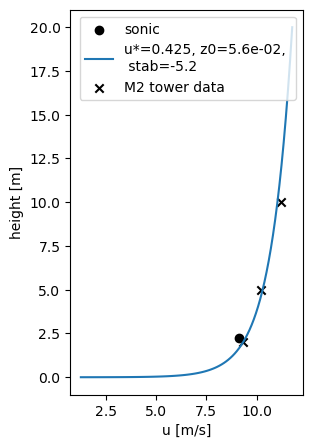

In [86]:
# log law profile at flatirons based on M2 tower measurements 
# to approximate u_ref input to gen_turb

z_log = np.logspace(-3, np.log10(z_max), 100) #np.linspace(0.1, 10, 20)
u_log = (m2['u_star']/0.4)*(np.log(z_log/m2['z0'])-m2['stab'])
# u_log = (0.5/0.4)*np.log(z_log/0.05)+4.5 # to match M2 tower data
# u_log = (0.55/0.4)*np.log(z_log/0.05)+4.5 # to match sonic data

# y_idx = (np.abs(y - 0.0)).argmin()
u_inp = {}
u_inp['sonic'] = sonic_data.filter(regex='u_', axis=1).values.squeeze()

fig, axs = plt.subplots(figsize=[3,5])
axs.scatter(u_inp['sonic'].mean(), z_sonic1, color='k', label='sonic')
# axs[0].scatter(u_inp['sim'].mean(axis=0), z_fp, color='r', label='sim')
axs.plot(u_log, z_log, label=f'u*={m2['u_star']:.3f}, z0={m2['z0']:.1e}, \n stab={m2['stab']:.1f}')
axs.scatter(m2['u'], m2['z'], color='k', marker='x', label='M2 tower data')
axs.legend();
axs.set_xlabel('u [m/s]')
axs.set_ylabel('height [m]')
# print('u_max = ',u_inp['sim'].mean(axis=0).max())

Found 11 best-fit parameter sets


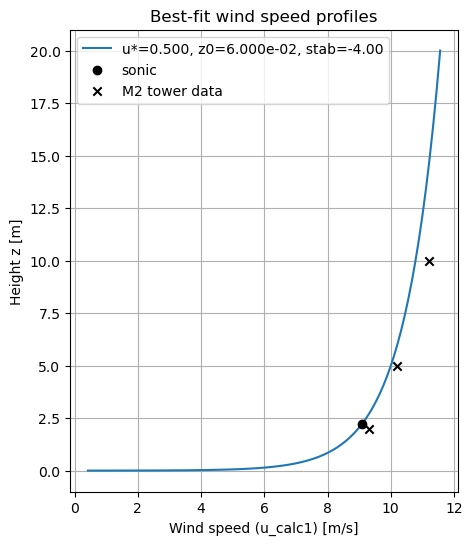

In [105]:
# now find best fit log-law based on duramat sonic measurement data
target_wspds = [u_inp['sonic'].mean()] # [1.0, 3.0, 5.0]

# Constants
d0 = 0.0 #0.8*h_panels #0.0 # because this sensor is above the solar panel canopy
z_target = z_sonic1
kappa = 0.4

# Sweep ranges (smaller for demo; increase for real use)
u_star_values = np.linspace(0.4, 0.5, 5)
z0_values = np.linspace(0.04, 0.06, 6) # np.logspace(-2, -1, 20) # np.logspace(-3, -1, 30) #[0.03] # np.logspace(-3, -1, 30)
stab_values = np.linspace(-6, -4, 6) # np.linspace(-1, 0.5, 20) #np.linspace(-2, 1, 30)

# Heights to plot
z_values = np.logspace(-3, np.log10(z_max), 100)

for target_u in target_wspds:

    results = []

    for u_star, z0, stab in itertools.product(u_star_values, z0_values, stab_values):
    # for z0 in itertools.product(z0_values):
        if z_target <= d0 or z0 <= 0:
            continue

        u_calc1 = (u_star / kappa) * (np.log((z_target - d0) / z0) - stab)

        # first select based on error at first height
        if np.isclose(u_calc1, target_u, rtol=0.01):
            # calculate error
            error = np.abs(u_calc1 - target_u)
            
            results.append((u_star, z0, stab, u_calc1, error))


    df_results = pd.DataFrame(results, columns=['u_star', 'z0', 'stab', 'u_calc1', 'abs_error'])

    print(f"Found {len(df_results)} best-fit parameter sets")

    # Plot selected profile
    plt.figure(figsize=(5,6))

    # select the params with the smallest absolute error
    sel_params = df_results.loc[df_results['abs_error'].idxmin()]
    profile = (sel_params['u_star'] / kappa) * (np.log((z_values - d0) / sel_params['z0']) - sel_params['stab'])
    plt.plot(profile, z_values, label=f'u*={u_star:.3f}, z0={z0:.3e}, stab={stab:.2f}')

    plt.scatter(u_inp['sonic'].mean(), z_sonic1, color='k', label='sonic', zorder = 99)
    plt.scatter(m2['u'], m2['z'], color='k', marker='x', label='M2 tower data', zorder=100)
    
    plt.xlabel('Wind speed (u_calc1) [m/s]')
    plt.ylabel('Height z [m]')
    plt.title('Best-fit wind speed profiles')
    plt.legend()
    plt.grid(True)
    # plt.xlim([8, 11])
    # plt.ylim([2.0, 7.0])

    plt.show()

# m2['u_star'] = df_errors_sorted['u_star'][0].round(3)
# m2['z0'] = df_errors_sorted['z0'][0].round(3)
# m2['stab'] = df_errors_sorted['stab'][0].round(3)
# print(f'choosing top-ranked params: u_star={m2['u_star']}m/s, z0={m2['z0']}m, stab={m2['stab']}')

u_star       0.450000
z0           0.056000
stab        -4.400000
u_calc1      9.094956
abs_error    0.007196
Name: 7, dtype: float64